In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#### Загрузить данные в pandas по url=https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

In [41]:
dataset = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep="\t")

dataset.head(7)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69


#### 1. Вывести: кол-во наблюдений в датасете

In [42]:
print(dataset.shape[0])

4622


#### 2. Вывести названия столбцов

In [43]:
for columns in dataset.columns:
    print(columns)

order_id
quantity
item_name
choice_description
item_price


#### 3. Определить самую частую позицию (item) в заказе 

In [44]:
dataset['item_name'].mode()[0]

'Chicken Bowl'

#### 4. Построить гистрограмму частоты заказов по позициям (item )

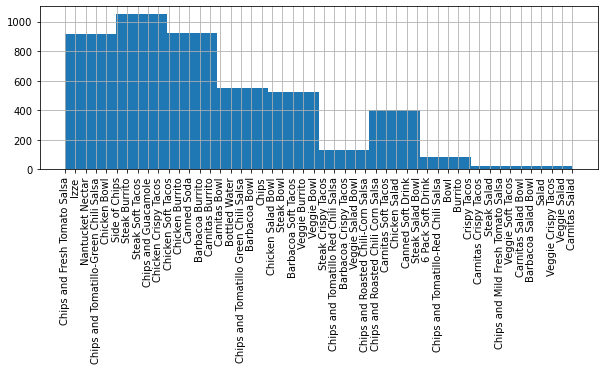

In [45]:
hist=dataset['item_name'].hist(xrot=90, figsize=(10,3))
figure=hist.get_figure()

#### 5. Измените тип переменной item_price c с помощью лямбды функции

In [46]:
print(type(dataset['item_price'][0]))
dataset['item_price'] = dataset['item_price'].apply(lambda x: float(x[1:]))
print(type(dataset['item_price'][0]))
dataset.head()

<class 'str'>
<class 'numpy.float64'>


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


#### 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)
#### 7. Средняя сумма заказа? (минимум 2 способа)
#### 8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе
#### 9. Определить статистику заказов стейков, а также статистику заказов прожарки.
#### 10. Добавить новый столбец цен на каждую позицию в заказе в рублях.
#### 11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.
#### 12. Определить цену по каждой позиции в отдельности. 


### Алгоритмы уменьшения размерности 

#### повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold
#### Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf)

#### необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.